# penguins_privbayes stacking

Training on penguins dataset using privbayes model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declare real dataset and split into train/test

In [2]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()
gen_method = "privbayes"
target = "species"

In [3]:
# Split penguins data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_real, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv("Data\penguins_train.csv", index=False)
penguins_test.to_csv("Data\penguins_test.csv", index=False)

In [3]:
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = penguins_real.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v1.csv", key="synth")

[2024-05-07T08:39:45.756224+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
0       Gentoo     Biscoe              40.9             13.7   
1       Adelie      Dream              37.3             17.8   
2       Gentoo     Biscoe              50.0             15.9   
3       Adelie     Biscoe              35.9             19.2   
4       Adelie     Biscoe              40.5             18.9   
..         ...        ...               ...              ...   
262  Chinstrap      Dream              50.9             19.1   
263     Adelie  Torgersen              37.2             19.4   
264     Adelie     Biscoe              39.7             17.7   
265     Gentoo     Biscoe              45.5             15.0   
266     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
0                214.0       4650.0  FEMALE  
1                191.0       3350.0  FEMALE  
2                224.0       5350.0    MALE  
3                189.0       3800.0 

# syn_v2

In [5]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate real and synthesized data
penguins_stack = pd.concat([penguins_real, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v1.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v1_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v2.csv", key="synth")

[2024-05-07T08:42:02.325740+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':        species     island  culmen_length_mm  culmen_depth_mm  \
235     Gentoo     Biscoe              45.1             14.5   
399  Chinstrap      Dream              41.1             20.6   
602     Adelie      Dream              35.7             17.1   
61      Adelie     Biscoe              41.1             19.1   
145     Adelie      Dream              41.5             18.5   
..         ...        ...               ...              ...   
71      Adelie  Torgersen              37.2             19.4   
106     Adelie     Biscoe              39.7             17.7   
270     Gentoo     Biscoe              45.5             15.0   
435     Adelie     Biscoe              39.6             19.9   
102     Adelie     Biscoe              38.1             17.0   

     flipper_length_mm  body_mass_g     sex  
235              215.0       5000.0  FEMALE  
399              200.2       4005.5    MALE  
602              185.9       3237.3  FEMALE  
61               188.0       4100.0 

# syn_v3

In [7]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v2.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v2_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v3.csv", key="synth")

[2024-05-07T08:42:03.111890+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1112  Chinstrap      Dream              45.5             19.4   
966      Gentoo      Dream              56.9             20.4   
598      Gentoo     Biscoe              45.2             15.8   
170   Chinstrap      Dream              46.7             17.9   
275      Gentoo     Biscoe              45.7             13.9   
...         ...        ...               ...              ...   
1095     Adelie      Dream              39.8             18.4   
1130     Adelie      Dream              36.4             18.3   
1294     Gentoo     Biscoe              51.0             14.8   
860      Adelie  Torgersen              38.6             20.4   
1126     Gentoo     Biscoe              46.6             13.6   

      flipper_length_mm  body_mass_g     sex  
1112              187.8       3516.6  FEMALE  
966               210.1       6263.6    MALE  
598               211.0       4522.5    MALE  
170               19

# syn_v4

In [9]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v3.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v3_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v4.csv", key="synth")

[2024-05-07T08:42:04.150832+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
1011     Adelie      Dream              36.6             16.6   
1273  Chinstrap      Dream              41.7             19.9   
69       Adelie  Torgersen              42.8             18.5   
2539     Gentoo     Biscoe              49.4             14.5   
942   Chinstrap      Dream              43.3             16.0   
...         ...        ...               ...              ...   
1638  Chinstrap      Dream              52.0             20.3   
1095     Adelie      Dream              39.8             18.4   
1130     Adelie      Dream              36.4             18.3   
1294     Gentoo     Biscoe              51.0             14.8   
860      Adelie  Torgersen              38.6             20.4   

      flipper_length_mm  body_mass_g     sex  
1011              183.9       2951.3  FEMALE  
1273              202.6       4163.3    MALE  
69                195.0       4250.0    MALE  
2539              22

# syn_v5

In [11]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v4.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v4_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = penguins_stack.shape[0]

Load(penguins_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\penguins_syn_v5.csv", key="synth")

[2024-05-07T08:42:05.642860+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


[{'train':         species     island  culmen_length_mm  culmen_depth_mm  \
5054  Chinstrap  Torgersen              43.1             18.4   
120      Adelie  Torgersen              38.8             17.6   
2351     Adelie     Biscoe              39.5             17.1   
1907     Adelie     Biscoe              36.7             19.3   
3648     Adelie      Dream              49.8             20.9   
...         ...        ...               ...              ...   
3092     Gentoo     Biscoe              49.4             16.4   
3772  Chinstrap      Dream              40.3             16.8   
5191  Chinstrap      Dream              46.5             17.5   
5226     Adelie      Dream              33.9             17.4   
860      Adelie  Torgersen              38.6             20.4   

      flipper_length_mm  body_mass_g     sex  
5054              185.8       3465.6  FEMALE  
120               191.0       3275.0  FEMALE  
2351              201.7       4011.2  FEMALE  
1907              19

# stack_v5 - Final stack

In [13]:
# Read synthesized data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# Concatenate stack and synthesized data
penguins_stack = pd.concat([penguins_stack, penguins_syn], ignore_index=True)

# Save to csv
penguins_stack.to_csv(f"{gen_method}\penguins_stack_v5.csv", index=False)

# Split stack data into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_v5_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:42:07.868069+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# stack_v5 (synth only)

In [15]:
# Remove the first 334 rows, equal to the real data, from stack_v5
penguins_stack_synth_only = penguins_stack.iloc[334:, :]

# Save to csv
penguins_stack_synth_only.to_csv(f"{gen_method}\penguins_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
penguins_train, penguins_test = train_test_split(penguins_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
penguins_train.to_csv(f"{gen_method}\penguins_stack_synth_only_train.csv", index=False)
penguins_test.to_csv(f"{gen_method}\penguins_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(penguins_train).Train(plugin=gen_method)

[2024-05-07T08:42:10.155124+0200][11300][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':          species     island  culmen_length_mm  culmen_depth_mm  \
9876      Adelie     Biscoe              38.1             19.5   
10068     Gentoo     Biscoe              46.8             15.0   
10316     Adelie      Dream              35.6             16.9   
8622      Gentoo     Biscoe              44.7             13.8   
8994      Gentoo     Biscoe              47.2             15.8   
...          ...        ...               ...              ...   
5734      Adelie  Torgersen              38.2             17.5   
5191   Chinstrap      Dream              46.5             17.5   
5390   Chinstrap      Dream              50.4             19.2   
860       Adelie  Torgersen              38.6             20.4   
7270   Chinstrap      Dream              39.4             18.6   

       flipper_length_mm  body_mass_g     sex  
9876               195.4       3790.5  FEMALE  
10068              216.2       4965.4  FEMALE  
10316              184.7       5804.2  FEMALE  
8622

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = penguins_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':          species  island  culmen_length_mm  culmen_depth_mm  \
1381   Chinstrap   Dream              57.6             21.5   
7695      Adelie  Biscoe              40.6             17.8   
10167     Gentoo  Biscoe              48.4             15.6   
5550      Gentoo  Biscoe              47.4             14.1   
1100      Adelie   Dream              43.7             18.6   
...          ...     ...               ...              ...   
6068      Adelie  Biscoe              37.8             17.8   
5525      Gentoo  Biscoe              39.6             13.5   
5724   Chinstrap   Dream              41.6             17.2   
1194      Gentoo  Biscoe              44.8             13.7   
7604   Chinstrap   Dream              45.6             18.8   

       flipper_length_mm  body_mass_g     sex  
1381               210.4       4697.2    MALE  
7695               194.1       3340.4  FEMALE  
10167              216.0       5166.3    MALE  
5550               201.4       4503.3   

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [21]:
# Read train and test data (this is base/real train and test data, not the stack data)
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read syn_v1 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v1.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_real = S.evaluate(penguins_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.004826,0.009297,0.995174,0.009297
1,pca_eigval_diff,u,0.110534,NaN,0.889466,NaN
2,pca_eigvec_ang,u,0.120486,NaN,0.961648,NaN
3,avg_cio,u,0.815728,0.029411,0.815728,0.029411
4,corr_mat_diff,u,0.948979,NaN,0.954811,NaN
5,mutual_inf_diff,u,0.784344,NaN,0.962650,NaN
6,ks_tvd_stat,u,0.045749,0.006011,0.954251,0.006011
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.013485,0.007444,0.986515,0.007444
9,avg_pMSE,u,0.004500,0.000535,0.982000,0.002140


# Eval on syn_2

In [22]:
# Read train and test data from stack_v1
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v1_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v1_test.csv")

# Read syn_v2 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v2.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v1 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.011503,0.006744,0.988497,0.006744
1,pca_eigval_diff,u,0.054968,NaN,0.945032,NaN
2,pca_eigvec_ang,u,0.079051,NaN,0.974837,NaN
3,avg_cio,u,0.508183,0.212754,0.508183,0.212754
4,corr_mat_diff,u,0.695598,NaN,0.966876,NaN
5,mutual_inf_diff,u,0.332875,NaN,0.984149,NaN
6,ks_tvd_stat,u,0.036811,0.006662,0.963189,0.006662
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.008600,0.004120,0.991400,0.004120
9,avg_pMSE,u,0.001682,0.000298,0.993272,0.001192


# Eval on syn_3

In [23]:
# Read train and test data from stack_v2
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v2_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v2_test.csv")

# Read syn_v3 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v3.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v2 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.002141,0.004791,0.997859,0.004791
1,pca_eigval_diff,u,0.004845,NaN,0.995155,NaN
2,pca_eigvec_ang,u,0.044365,NaN,0.985878,NaN
3,avg_cio,u,0.825671,0.058933,0.825671,0.058933
4,corr_mat_diff,u,0.294916,NaN,0.985956,NaN
5,mutual_inf_diff,u,0.153581,NaN,0.992687,NaN
6,ks_tvd_stat,u,0.018065,0.003749,0.981935,0.003749
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.100921,0.098763,0.899079,0.098763
9,avg_pMSE,u,0.000342,0.000081,0.998631,0.000324


# Eval on syn_4

In [24]:
# Read train and test data from stack_v3
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v3_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v3_test.csv")

# Read syn_v4 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v4.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v3 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.003030,0.003415,0.996970,0.003415
1,pca_eigval_diff,u,0.020832,NaN,0.979168,NaN
2,pca_eigvec_ang,u,0.042192,NaN,0.986570,NaN
3,avg_cio,u,0.682742,0.138625,0.682742,0.138625
4,corr_mat_diff,u,0.232265,NaN,0.988940,NaN
5,mutual_inf_diff,u,0.117364,NaN,0.994411,NaN
6,ks_tvd_stat,u,0.013101,0.002408,0.986899,0.002408
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.002640,0.001257,0.997360,0.001257
9,avg_pMSE,u,0.000293,0.000048,0.998826,0.000193


# Eval on syn_5

In [25]:
# Read train and test data from stack_v4
penguins_train = pd.read_csv(f"{gen_method}\penguins_stack_v4_train.csv")
penguins_test = pd.read_csv(f"{gen_method}\penguins_stack_v4_test.csv")

# Read syn_v5 data
penguins_syn = pd.read_csv(f"{gen_method}\penguins_syn_v5.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v4 = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016237,0.002419,0.983763,0.002419
1,pca_eigval_diff,u,0.063862,NaN,0.936138,NaN
2,pca_eigvec_ang,u,0.038493,NaN,0.987747,NaN
3,avg_cio,u,0.148934,0.148934,0.148934,0.148934
4,corr_mat_diff,u,0.428643,NaN,0.979588,NaN
5,mutual_inf_diff,u,0.134608,NaN,0.993590,NaN
6,ks_tvd_stat,u,0.036068,0.005875,0.963932,0.005875
7,frac_ks_sigs,u,0.857143,NaN,0.142857,NaN
8,avg_h_dist,u,0.011082,0.005787,0.988918,0.005787
9,avg_pMSE,u,0.001926,0.000065,0.992296,0.000260


# Eval on stack_v5 to real data

This evaluation will be different. We will evaluate the synth data generated based off our training of stack_v5, but we will insert the real_data train and test set, in order to see how close or far the stacked synthetic data compares to the original data.

In [26]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_v5_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_v5_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_v5_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.016658,0.009485,0.983342,0.009485
1,pca_eigval_diff,u,0.167501,NaN,0.832499,NaN
2,pca_eigvec_ang,u,0.247441,NaN,0.921237,NaN
3,avg_cio,u,0.439940,0.158413,0.439940,0.158413
4,corr_mat_diff,u,1.435067,NaN,0.931663,NaN
5,mutual_inf_diff,u,0.842514,NaN,0.959880,NaN
6,ks_tvd_stat,u,0.064847,0.007611,0.935153,0.007611
7,frac_ks_sigs,u,0.000000,NaN,1.000000,NaN
8,avg_h_dist,u,0.017000,0.009127,0.983000,0.009127
9,avg_pMSE,u,0.004614,0.001465,0.981545,0.005861


# Eval on stack_synth_only to real data

We will do the same as above, but with the synth data generated based off our training of stack_synth_only.

In [27]:
# Read train and test data from real data
penguins_train = pd.read_csv("Data\penguins_train.csv")
penguins_test = pd.read_csv("Data\penguins_test.csv")

# Read stack_synth_only_syn data
penguins_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
penguins_syn = penguins_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(penguins_train, holdout_dataframe=penguins_test, verbose=0)
res_stack_synth_only_on_real = S.evaluate(penguins_syn,target,"full_eval")
res_stack_synth_only_on_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.017812,0.009401,0.982188,0.009401
1,pca_eigval_diff,u,0.115145,NaN,0.884855,NaN
2,pca_eigvec_ang,u,0.167252,NaN,0.946762,NaN
3,avg_cio,u,0.401759,0.237030,0.401759,0.237030
4,corr_mat_diff,u,1.260202,NaN,0.939990,NaN
5,mutual_inf_diff,u,0.835740,NaN,0.960203,NaN
6,ks_tvd_stat,u,0.071984,0.009584,0.928016,0.009584
7,frac_ks_sigs,u,0.142857,NaN,0.857143,NaN
8,avg_h_dist,u,0.017558,0.008389,0.982442,0.008389
9,avg_pMSE,u,0.004272,0.000330,0.982914,0.001322


# Multiple plots for evaluation comparisons

In [28]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [29]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4"]

In [30]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.426966,0.529085,0.131086
res_stack_v1,0.556180,0.513687,0.329588
res_stack_v2,0.643258,0.556886,0.521536
res_stack_v3,0.593355,0.579074,0.700515
res_stack_v4,0.538246,0.600513,0.801871


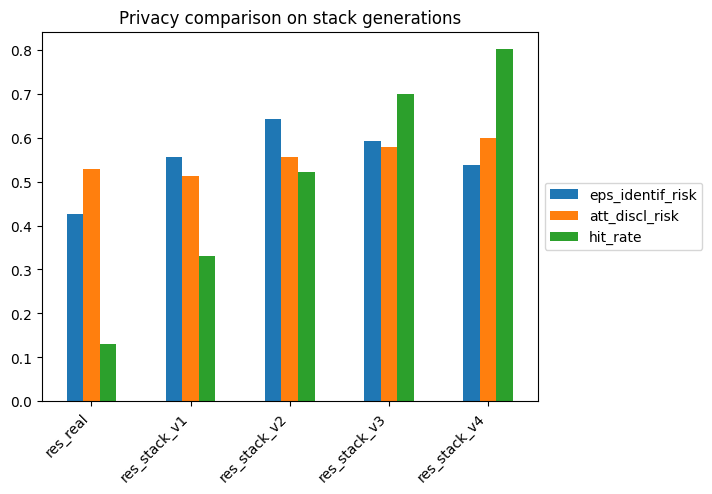

In [31]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [32]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.004826,0.110534,0.120486
res_stack_v1,0.011503,0.054968,0.079051
res_stack_v2,0.002141,0.004845,0.044365
res_stack_v3,0.003030,0.020832,0.042192
res_stack_v4,0.016237,0.063862,0.038493


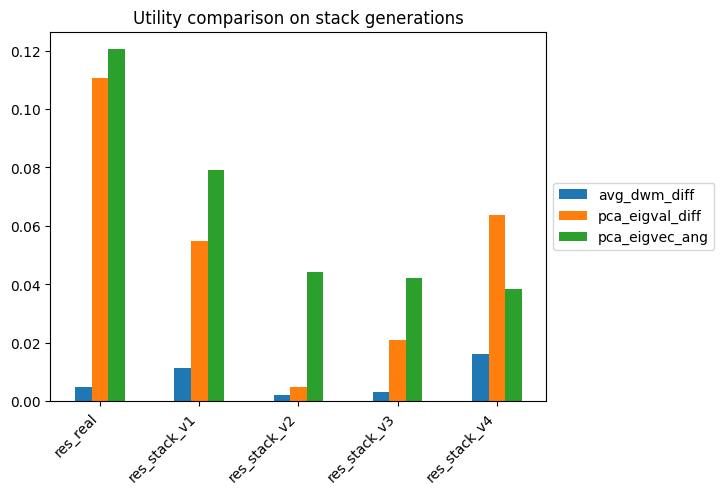

In [33]:
utility_plot.plot.bar()
plt.title("Utility comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [34]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.948979,0.784344
res_stack_v1,0.695598,0.332875
res_stack_v2,0.294916,0.153581
res_stack_v3,0.232265,0.117364
res_stack_v4,0.428643,0.134608


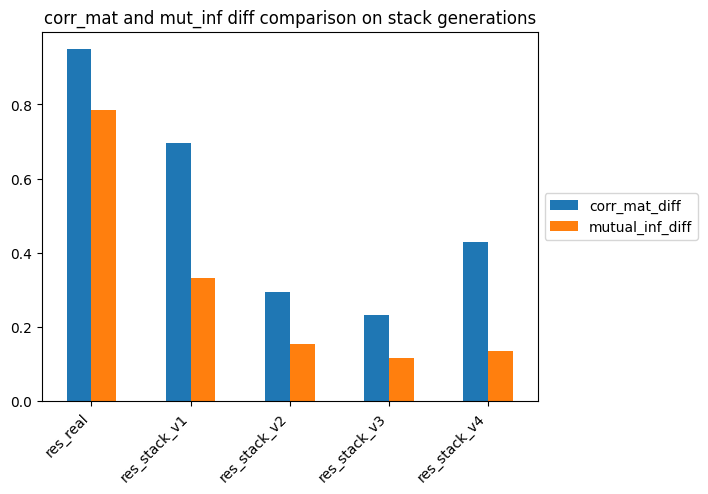

In [35]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on stack generations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [36]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.004826,0.110534,0.120486,0.815728,0.948979,0.784344,0.045749,0.000000,0.013485,0.004500,0.745902,0.069469,0.605755,0.015141,0.036565,0.074627,0.131086,0.426966,0.976471,0.529085
res_stack_v1,0.011503,0.054968,0.079051,0.508183,0.695598,0.332875,0.036811,0.000000,0.008600,0.001682,0.654076,0.127376,0.485756,0.183647,0.052425,0.085821,0.329588,0.556180,1.000000,0.513687
res_stack_v2,0.002141,0.004845,0.044365,0.825671,0.294916,0.153581,0.018065,0.000000,0.100921,0.000342,0.627810,0.086970,0.412090,0.139029,0.017308,0.026119,0.521536,0.643258,0.995522,0.556886
res_stack_v3,0.003030,0.020832,0.042192,0.682742,0.232265,0.117364,0.013101,0.000000,0.002640,0.000293,0.615282,0.089988,0.452012,0.080916,0.008414,0.010748,0.700515,0.593355,0.985821,0.579074
res_stack_v4,0.016237,0.063862,0.038493,0.148934,0.428643,0.134608,0.036068,0.857143,0.011082,0.001926,0.604864,0.078559,0.491380,0.073525,0.010292,0.009822,0.801871,0.538246,0.988411,0.600513


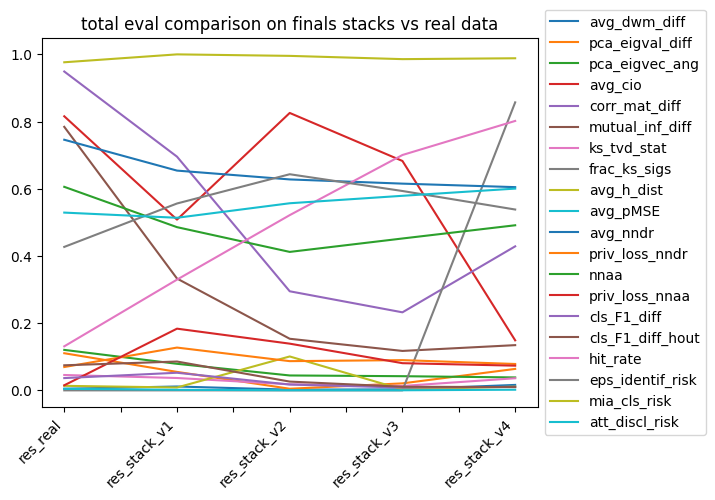

In [37]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Evaluting final stacks compared to real data

In [38]:
eval_results = [res_real, res_stack_v5_on_real, res_stack_synth_only_on_real]
eval_str = ["res_real", "res_stack_v5_on_real", "res_stack_synth_only_on_real"]

In [39]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "hit_rate"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["hit_rate", "val"]]

privacy_plot

,eps_identif_risk,att_discl_risk,hit_rate
res_real,0.426966,0.529085,0.131086
res_stack_v5_on_real,0.374532,0.485030,0.067416
res_stack_synth_only_on_real,0.370787,0.500855,0.074906


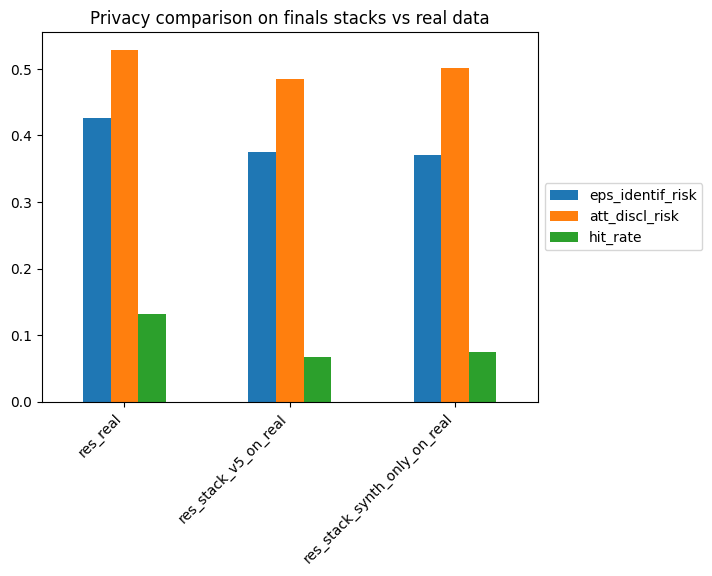

In [40]:
privacy_plot.plot.bar()
plt.title("Privacy comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [41]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "pca_eigval_diff",
                                     "pca_eigvec_ang"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["pca_eigval_diff", "val"],
                                    evals.loc["pca_eigvec_ang", "val"]]

utility_plot

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
res_real,0.004826,0.110534,0.120486
res_stack_v5_on_real,0.016658,0.167501,0.247441
res_stack_synth_only_on_real,0.017812,0.115145,0.167252


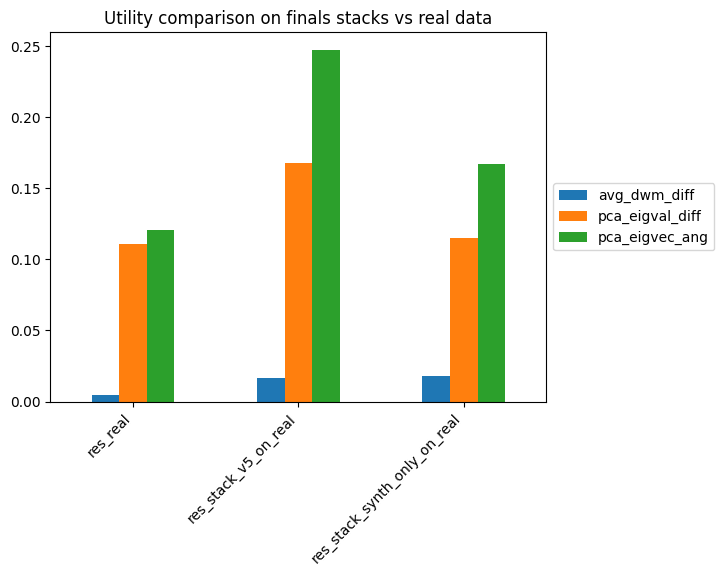

In [42]:
utility_plot.plot.bar()
plt.title("Utility comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [43]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff",
                                     "mutual_inf_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"], 
                                    evals.loc["mutual_inf_diff", "val"]]

matrix_diff_plot

,corr_mat_diff,mutual_inf_diff
res_real,0.948979,0.784344
res_stack_v5_on_real,1.435067,0.842514
res_stack_synth_only_on_real,1.260202,0.835740


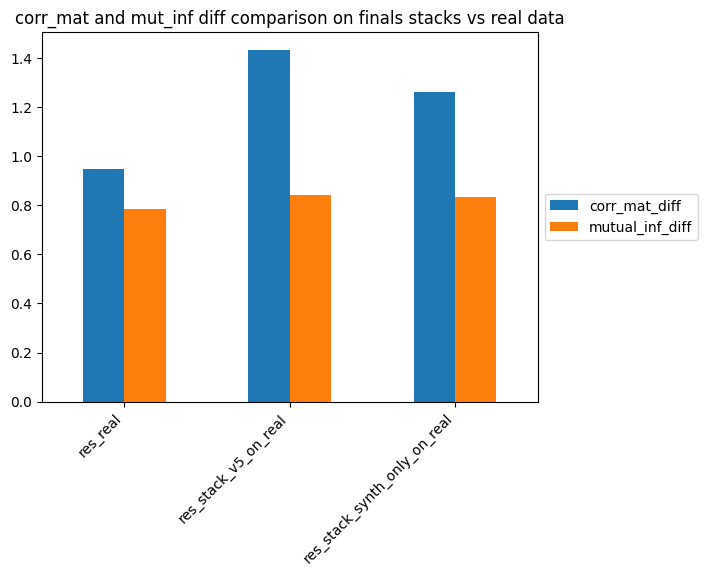

In [44]:
matrix_diff_plot.plot.bar()
plt.title("corr_mat and mut_inf diff comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [45]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  #"median_DCR",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   #evals.loc["median_DCR", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.004826,0.110534,0.120486,0.815728,0.948979,0.784344,0.045749,0.000000,0.013485,0.004500,0.745902,0.069469,0.605755,0.015141,0.036565,0.074627,0.131086,0.426966,0.976471,0.529085
res_stack_v5_on_real,0.016658,0.167501,0.247441,0.439940,1.435067,0.842514,0.064847,0.000000,0.017000,0.004614,0.747176,-0.009267,0.620372,0.026146,0.062561,0.104478,0.067416,0.374532,0.976471,0.485030
res_stack_synth_only_on_real,0.017812,0.115145,0.167252,0.401759,1.260202,0.835740,0.071984,0.142857,0.017558,0.004272,0.774530,0.017710,0.623360,0.005993,0.090077,0.067164,0.074906,0.370787,0.994118,0.500855


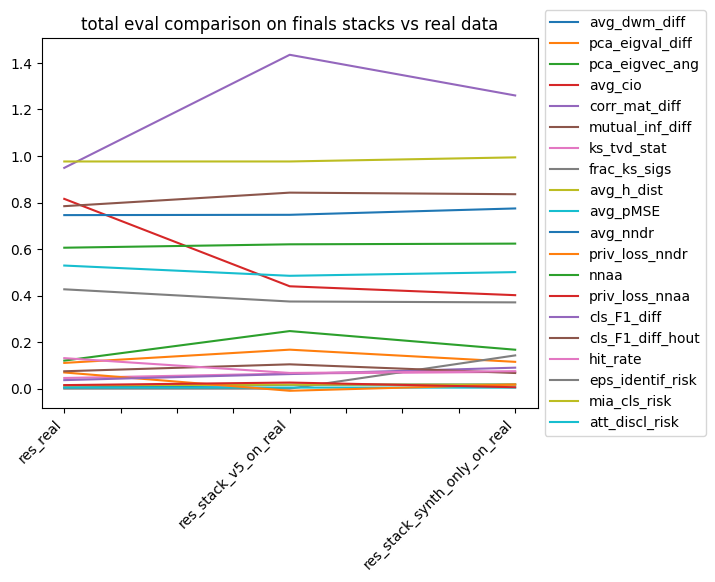

In [46]:
total_eval.plot.line()
plt.title("total eval comparison on finals stacks vs real data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()